In [1]:
# import libraries
import xarray as xr
import datetime as dt
import os
from datetime import datetime, timedelta
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from metpy.plots import ctables
from scipy.interpolate import UnivariateSpline
import sys
sys.path.insert(0, '/Users/acheung/TC_RI_P1/scripts/Useful Functions/')
from cylindrical_conversion import x_y_grid_to_cylindrical
from cylindrical_conversion import interp_to_equal_grid
from distance import distance_calculator, get_angle, pointdist_calc,math_to_meteo_angle
clevs1 = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
cmap = ctables.registry.get_with_boundaries('precipitation',clevs1)[1]
norm = ctables.registry.get_with_boundaries('precipitation',clevs1)[0]
cmap2 = ctables.registry.get_colortable('NWSReflectivity')

In [2]:
def round_to_nearest_half_hour(t):
    if t.minute < 15:
        return t.replace(minute=0, second=0, microsecond=0)
    elif t.minute < 45:
        return t.replace(minute=30, second=0, microsecond=0)
    else:
        return (t.replace(hour=t.hour + 1, minute=0, second=0, microsecond=0)
                if t.hour < 23 else t.replace(day=t.day + 1, hour=0, minute=0, second=0, microsecond=0))

def save_list(f_name,list_des):
    import pickle
    with open(f_name, "wb") as fp:   #Pickling
        pickle.dump(list_des, fp)

In [3]:
# Open Dataset
tc_radar_data_pre = xr.open_dataset('/Users/acheung/data/TC_RADAR/merged/tc_radar_v3k_1997_2019_xy_rel_merge_ships.nc?download=1')

# Snip TC-RADAR Dataset to times wit IMERG data (2000 and later)
good_inds = tc_radar_data_pre['merge_year'].where(tc_radar_data_pre['merge_year']>=2000).dropna('num_cases')['num_cases']
tc_radar_data = tc_radar_data_pre.sel(num_cases = good_inds)

# Identify all storm names and times to find IMERG data closest to TC RADAR Merged Time
years,months,days,hours,minutes = tc_radar_data['merge_year'].values,\
    tc_radar_data['merge_month'].values,tc_radar_data['merge_day'].values,\
    tc_radar_data['merge_hour'].values,tc_radar_data['merge_min'].values


In [4]:
# Find file paths and download any files not in directory

timedeltas = [-60,-30,0,30] # zero is 0 to 30 minutes and thirty is 30 mins to 1 h
# timedeltas = [0] # zero is 0 to 30 minutes and thirty is 30 mins to 1 h

filepaths = []
for i in range(len(tc_radar_data['num_cases'])):
    curr_time_filepaths = []
    for times in timedeltas:
        tc_radar_time = dt.datetime(years[i],months[i],days[i],hours[i],minutes[i])
        rounded_time = round_to_nearest_half_hour(tc_radar_time)
        time_desired = rounded_time + dt.timedelta(minutes=times)
#         print(tc_radar_time,rounded_time)

        year = time_desired.year
        day_of_year = time_desired.strftime('%j')
        day_stripped = time_desired.strftime('%Y%m%d')
        time_stripped = time_desired.strftime('%H%M%S')
        min_of_day = str(time_desired.hour*60 + time_desired.minute).zfill(4)
        end_time_stripped = (time_desired+dt.timedelta(minutes=29,seconds=59)).strftime('%H%M%S')

        # If IMERG file does not exist, download it
        IMERG_file_path = '/Users/acheung/data/IMERG/'+str(year)+'/'+day_of_year+'/'+\
            '3B-HHR.MS.MRG.3IMERG.'+day_stripped+'-S'+time_stripped+'-E'+end_time_stripped+\
            '.'+min_of_day+'.V07B.HDF5'
        curr_time_filepaths.append(IMERG_file_path)
        print(os.path.exists(IMERG_file_path))

            # If day directory does not exist, make day directory
        if os.path.exists('/Users/acheung/data/IMERG/'+str(year)) == False:
            os.mkdir('/Users/acheung/data/IMERG/'+str(year))

        if os.path.exists('/Users/acheung/data/IMERG/'+str(year)+'/'+day_of_year) == False:
            os.mkdir('/Users/acheung/data/IMERG/'+str(year)+'/'+day_of_year)
        
        if os.path.exists(IMERG_file_path) == False:
            url_desired = "https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L3/GPM_3IMERGHH.07/"\
                +str(year)+'/'+day_of_year+'/'+'3B-HHR.MS.MRG.3IMERG.'+day_stripped+'-S'+time_stripped+\
                '-E'+end_time_stripped+'.'+min_of_day+'.V07B.HDF5'
            os.chdir('/Users/acheung/data/IMERG/'+str(year)+'/'+day_of_year)

            os.system('wget --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies --keep-session-cookies '
                      + url_desired)
    filepaths.append(curr_time_filepaths)
    
all_time_filepaths = pd.DataFrame(filepaths)
all_time_filepaths.index = tc_radar_data['num_cases'].astype(int)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


0


/tmp/ipykernel_69793/3860913496.py:302: RuntimeWarning: Mean of empty slice
  cylindrical_data_reflectivity_azi_mean = np.nanmean(cylindrical_data_radar,axis=1)
/tmp/ipykernel_69793/3860913496.py:434: RuntimeWarning: Mean of empty slice
  cylindrical_data_rain_azi_mean = np.nanmean(cylindrical_data_rain,axis=1)


Saving at: /Users/acheung/data/Figures/Radar_and_IMERG/FABIAN (2003)/IMERG_TC_RADAR_COMP_2003-09-03 20:02:00.png
1



KeyboardInterrupt



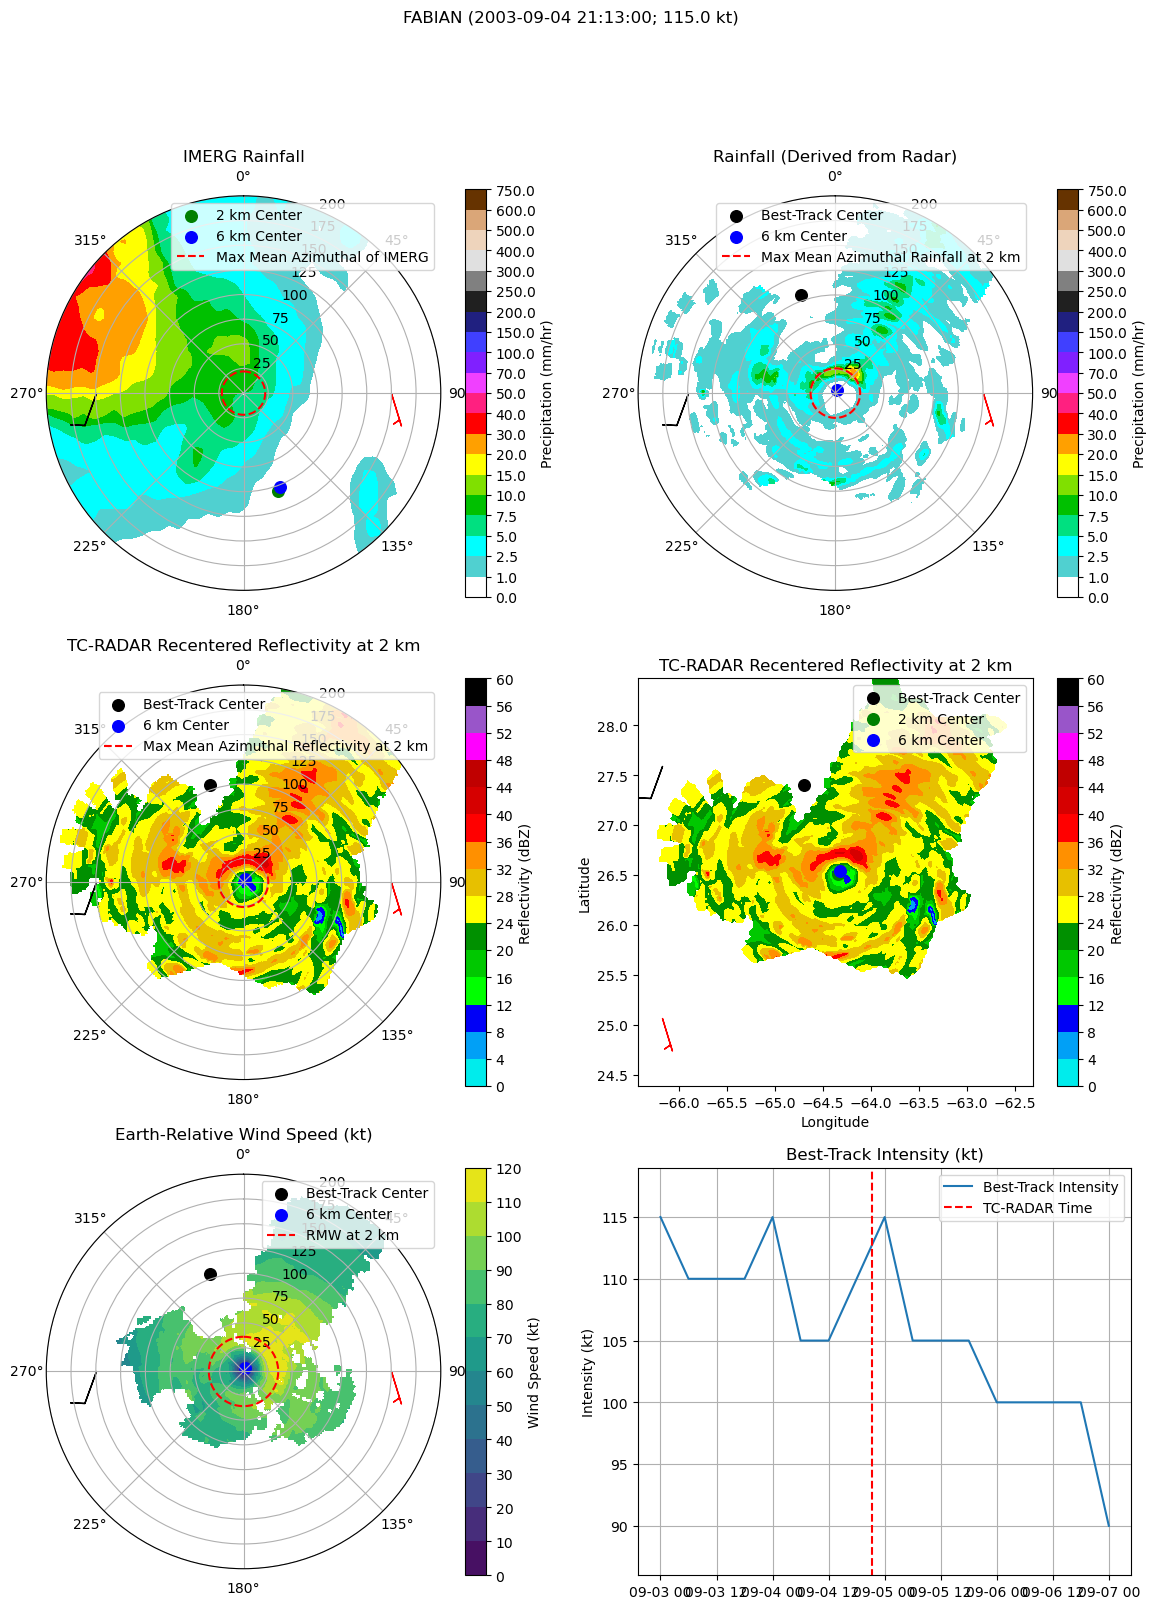

In [5]:
height = 2
high_height = 6
grid_type = 'recentered'

bad_mission_list = [] # Record which missions had missing data
all_image_paths = [] # Records where all the images are saved to be opened for QC

for case_loop in tc_radar_data['num_cases'].astype(int).values: # Run all
# for case_loop in [76,77,78,79,80]: # Custom Start and End

    # Only do storms that are tropical or subtropical, if neither, continue loop
    stype_ships = float(tc_radar_data['stype_ships'].sel(num_cases=case_loop,num_ships_times = 0).values)
    if (stype_ships != 1) and (stype_ships != 2):
        print('skipped '+ str(case_loop))
        continue
        
    print(case_loop)
    
    # Open IMERG and do 4 image average
    precip_list = []
    for now_it in range(len(all_time_filepaths.loc[case_loop])):
        fn = all_time_filepaths.loc[case_loop][now_it]
        f = h5py.File(fn, 'r')

        # Work on precip file
        groups = [ x for x in f.keys() ]
        # print(groups)
        gridMembers = [ x for x in f['Grid'] ]
        # print(gridMembers)

        # Get the precipitation, latitude, and longitude variables
        precip = f['Grid/precipitation'][0][:][:]
        precip = np.transpose(precip)
        precip[precip<-999]=np.nan

        theLats = f['Grid/lat'][:]
        theLons = f['Grid/lon'][:]
        x, y = np.float32(np.meshgrid(theLons, theLats))

        precip_list.append(precip)
    
    # For now, we take a mean. Might need a different filter in the future
    precip_mean = np.mean(np.asarray(precip_list),axis=0)
    
    #---------------------------------------------------------------------------------------------------------
    radar_lat_grid = tc_radar_data[grid_type+'_latitudes'].sel(num_cases=case_loop)
    radar_lat_grid_drop_1 = radar_lat_grid.dropna('x_dist',thresh=1).dropna('y_dist',thresh=1)
    
    lat_loc_arrs = np.where(radar_lat_grid_drop_1.isnull()) # first array is y, second array is x
    lat_arr_0_unique_len = len(np.unique(lat_loc_arrs[0]))
    lat_arr_1_unique_len = len(np.unique(lat_loc_arrs[1]))
    
    # These conditional statements help decide which axis to drop, maximizing grid size
    if lat_arr_0_unique_len > lat_arr_1_unique_len:    
        radar_lat_grid_dropped = radar_lat_grid_drop_1.dropna('x_dist')
    elif lat_arr_0_unique_len < lat_arr_1_unique_len:
        radar_lat_grid_dropped = radar_lat_grid_drop_1.dropna('y_dist')
    else:
        radar_lat_grid_dropped = radar_lat_grid_drop_1.dropna('x_dist')   
    
    radar_lon_grid = tc_radar_data[grid_type+'_longitudes'].sel(num_cases=case_loop)
    radar_lon_grid_drop_1 = radar_lon_grid.dropna('x_dist',thresh=1).dropna('y_dist',thresh=1)

    lon_loc_arrs = np.where(radar_lon_grid_drop_1.isnull()) # first array is y, second array is x
    lon_arr_0_unique_len = len(np.unique(lon_loc_arrs[0]))
    lon_arr_1_unique_len = len(np.unique(lon_loc_arrs[1]))

    # These conditional statements help decide which axis to drop, maximizing grid size
    if lon_arr_0_unique_len > lon_arr_1_unique_len:    
        radar_lon_grid_dropped = radar_lon_grid_drop_1.dropna('x_dist')
    elif lon_arr_0_unique_len < lon_arr_1_unique_len:
        radar_lon_grid_dropped = radar_lon_grid_drop_1.dropna('y_dist')
    else:
        radar_lon_grid_dropped = radar_lon_grid_drop_1.dropna('x_dist')
        
        # If there is no data due to lack of passes, record and continue
    if len(radar_lon_grid_dropped) == 0 or len(radar_lat_grid_dropped) == 0:
        bad_mission = tc_radar_data['mission_ID'].sel(num_cases=case_loop)
        bad_mission_list.append(bad_mission)
        print('Bad Mission')
        continue
#     #---------------------------------------------------------------------------------------------------------

    long_inds = np.where((x>=np.nanmin(radar_lon_grid_dropped.values)) &
             (x <= np.nanmax(radar_lon_grid_dropped.values)))

    lat_inds = np.where((y>=np.nanmin(radar_lat_grid_dropped.values)) &
             (y <= np.nanmax(radar_lat_grid_dropped.values)))
    
    sliced_precip = precip_mean[lat_inds[0].min()-40:lat_inds[0].max()+40,long_inds[1].min()-40:long_inds[1].max()+40]
    sliced_lon_grid = x[lat_inds[0].min()-40:lat_inds[0].max()+40,long_inds[1].min()-40:long_inds[1].max()+40]
    sliced_lat_grid = y[lat_inds[0].min()-40:lat_inds[0].max()+40,long_inds[1].min()-40:long_inds[1].max()+40]
    bt_lat, bt_lon = tc_radar_data['lat_ships'].sel(num_cases=case_loop).sel(num_ships_times=0).values,\
        tc_radar_data['lon_ships'].sel(num_cases=case_loop).sel(num_ships_times=0).values*-1

    # 2 km center
    radar_center_lat = tc_radar_data['tc_center_latitudes'].sel(num_cases=case_loop).sel(level=height).values
    radar_center_lon = tc_radar_data['tc_center_longitudes'].sel(num_cases=case_loop).sel(level=height).values
    
    # 6 km center
    
    radar_center_lat_high = tc_radar_data['tc_center_latitudes'].sel(num_cases=case_loop).sel(level=high_height).values
    radar_center_lon_high = tc_radar_data['tc_center_longitudes'].sel(num_cases=case_loop).sel(level=high_height).values
    
    fig = plt.figure(figsize=(14, 18)) 
    
    gs = fig.add_gridspec(3,2)
    ax1 = fig.add_subplot(gs[0, 0],projection='polar')
    ax2 = fig.add_subplot(gs[1, 0],projection='polar')
    ax3 = fig.add_subplot(gs[2, 1])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0],projection='polar')
    ax6 = fig.add_subplot(gs[0, 1],projection='polar')

#     clevs1=np.arange(0,36.1,2)
    
#---------------------------IMERG Cartesian Plot--------------------------------------------
    # Plot IMERG pcolormesh. cmap has 21 levels, so we use factors of 21 for vmax.
#     imerg_plot = ax1.contourf(sliced_lon_grid,sliced_lat_grid,sliced_precip,clevs1,cmap=cmap)

    bt_lats = tc_radar_data.sel(num_cases=case_loop)['lat_ships'].dropna('num_ships_times').values
    bt_lons = tc_radar_data.sel(num_cases=case_loop)['lon_ships'].dropna('num_ships_times').values * -1

    bt_times = tc_radar_data.sel(num_cases=case_loop)['num_ships_times'].where(tc_radar_data.sel(num_cases=case_loop)['lat_ships'].notnull()).dropna('num_ships_times').values
    
    year_now,month,day,hour,minute = tc_radar_data['merge_year'].sel(num_cases=case_loop).values,\
        tc_radar_data['merge_month'].sel(num_cases=case_loop).values,tc_radar_data['merge_day'].sel(num_cases=case_loop).values,\
        tc_radar_data['merge_hour'].sel(num_cases=case_loop).values,tc_radar_data['merge_min'].sel(num_cases=case_loop).values
    
    merged_time = dt.datetime(year_now,month,day,hour,minute)
    
    # Get Storm Name and time
    storm_name = str(tc_radar_data['storm_name'].sel(num_cases=case_loop).values)
    current_tc_radar_time = merged_time

    # Overall Subplot Title
    bt_vmax = tc_radar_data['vmax_ships'].sel(num_cases=case_loop).sel(num_ships_times=0).values
    fig.suptitle(storm_name + ' (' + str(current_tc_radar_time) + '; '+str(bt_vmax)+' kt)')
      
    nearest_syn = pd.DataFrame([merged_time])[0].dt.round("6h")[0]
    nearest_syn_ts = pd.DataFrame([merged_time])[0].dt.round("6h")[0].timestamp()
    time_secs_arr = nearest_syn_ts + (bt_times * 3600)
    
    # Don't plot best-track (SHIPS) center if there is no information
    if len(bt_lats) > 0:
        latspl = UnivariateSpline(time_secs_arr,bt_lats,k=5,s=0)
        interp_lat = latspl(merged_time.timestamp())
    if len(bt_lons) > 0:
        lonspl = UnivariateSpline(time_secs_arr,bt_lons,k=5,s=0)
        interp_lon = lonspl(merged_time.timestamp())

    # Find distances and angle from center of image for polar plotting later
    
    # Get angles from center (MATH angles)
    # Remember, IMERG is centered to best-track and TC-RADAR is centered to height image
    
    # For TC-Radar Centers
    best_track_angle = math_to_meteo_angle(get_angle(radar_center_lon,radar_center_lat,
                                 interp_lon,interp_lat)) * (np.pi/180)
    

    high_height_angle = math_to_meteo_angle(get_angle(radar_center_lon,radar_center_lat,
                                 radar_center_lon_high,radar_center_lat_high)) * (np.pi/180)

    # For IMERG Centers
    low_height_angle_imerg = math_to_meteo_angle(get_angle(interp_lon,interp_lat,
                                        radar_center_lon,radar_center_lat)) * (np.pi/180)
    
    high_height_angle_imerg = math_to_meteo_angle(get_angle(interp_lon,interp_lat,radar_center_lon_high,
                                         radar_center_lat_high)) * (np.pi/180)
    
    
    # Get distance from center
    
    # For TC-Radar Centers
    best_track_dist = pointdist_calc(Lat1 = radar_center_lat,Lon1 = radar_center_lon,
                                     Lat2 = interp_lat,Lon2 = interp_lon) # km

    high_height_dist = pointdist_calc(Lat1 = radar_center_lat,Lon1 = radar_center_lon,
                                     Lat2 = radar_center_lat_high,Lon2 = radar_center_lon_high) # km

    # For IMERG Centers

    low_height_dist_imerg = pointdist_calc(Lat1 = interp_lat,Lon1 = interp_lon,
                                     Lat2 = radar_center_lat,Lon2 = radar_center_lon) # km

    high_height_dist_imerg = pointdist_calc(Lat1 = interp_lat,Lon1 = interp_lon,
                                     Lat2 = radar_center_lat_high,Lon2 = radar_center_lon_high) # km
    # For IMERG Centers

#     if (len(bt_lons) > 0) and (len(bt_lats) > 0):
#         ax1.scatter(interp_lon,interp_lat,label='Best-Track Center',s=100)
    
#     ax1.scatter(radar_center_lon,radar_center_lat,label=str(height)+' km Center',s=100,c='k')
#     ax1.scatter(radar_center_lon_high,radar_center_lat_high,label=str(high_height)+' km Center',s=100,c='g')
#     ax1.grid()
#     ax1.legend()
#     ax1.set_xlabel('Longitude')
#     ax1.set_ylabel('Latitude')
#     ax1.set_title('IMERG Data')
    
    just_a_lon = radar_lon_grid_dropped[10,8].values
    just_a_lat = radar_lat_grid_dropped[160,8].values
    shr_dir = tc_radar_data['shtd_ships'].sel(num_cases=case_loop).sel(num_ships_times = 0).values
    shr_mag = tc_radar_data['shrd_ships'].sel(num_cases=case_loop).sel(num_ships_times = 0).values
    
    # NOT INTERPOLATED
    U = shr_mag * np.sin(shr_dir*(np.pi/180))
    V = shr_mag * np.cos(shr_dir*(np.pi/180))
    
    # NOT INTERPOLATED
    x_motion = tc_radar_data['motion_x_ships'].sel(num_cases=case_loop).sel(num_ships_times = 0).values
    y_motion = tc_radar_data['motion_y_ships'].sel(num_cases=case_loop).sel(num_ships_times = 0).values
    just_a_lat_2 = radar_lat_grid_dropped[20,8].values

#---------------------------IMERG Polar Plot--------------------------------------------

# NEVER FORGET TO MULTIPLY RADIUS ARRAYS BY DX FOR IMERG PLOTS!!!

    dx = 2
    dy = 2

    # Interpolate IMERG data to equal-distance grid

    eq_lon_grid,eq_lat_grid,eq_dist_data = interp_to_equal_grid(sliced_lon_grid,sliced_lat_grid,
                                                            sliced_precip,dx = dx,dy=dy)

    # Interpolate to cylindrical coordinates

    # First, use best-track center to find center index

    distance_arr = distance_calculator(eq_lon_grid, eq_lat_grid,(interp_lon,interp_lat)).values

    # Sometimes this may not center the best, given 10 km resolution
    nearest_ind = np.where(distance_arr == np.nanmin(distance_arr))

    # This identifies where the center point is in the IMERG data and goes with a radius that is within the data.
    ind_0 = eq_dist_data.shape[0]
    ind_1 = eq_dist_data.shape[1]
    diff_0 = ind_0 - nearest_ind[1]
    diff_1 = ind_1 - nearest_ind[0]
    max_rad_possible = np.asarray([diff_0,diff_1,nearest_ind[0],nearest_ind[1]]).min()

    cylindrical_data_IMERG, THETA_IMERG, rad_arr_IMERG = x_y_grid_to_cylindrical(center_inds=[nearest_ind[1][0],nearest_ind[0][0]],
                            radius_min=1,radius_max=max_rad_possible-1,radius_interval=1,
                            NOP=1000,x_grid=np.asarray(range(eq_dist_data.shape[0])),
                                                               y_grid=np.asarray(range(eq_dist_data.shape[1])),
                            data=eq_dist_data)
    
    # Find radius of max IMERG precip after taking azimuthal mean
    
    # Search only within 200 km for IMERG
    imerg_search_inds = np.where(rad_arr_IMERG*dx <= 200) # We only want to search within 200 km
    
    cylindrical_data_IMERG_azi_mean = np.nanmean(cylindrical_data_IMERG[imerg_search_inds],axis=1)
    max_mean_cylindrical_IMERG = np.nanmax(cylindrical_data_IMERG_azi_mean)
    max_mean_cylindrical_IMERG_rad = rad_arr_IMERG[imerg_search_inds][np.nanargmax(cylindrical_data_IMERG_azi_mean)]

    # Plot polar IMERG data
    ax1.grid(True)

    ax1.set_theta_direction(-1)
    ax1.set_theta_zero_location('N')
    ax1.set_title('IMERG Rainfall')
    # NEED TO CHECK ANGLES!!!
    imerg_cylindrical = ax1.contourf(THETA_IMERG, rad_arr_IMERG * dx,cylindrical_data_IMERG,clevs1,cmap=cmap,norm=norm)
    ax1.set_rlim(0,200.1)
    ax1.scatter(low_height_angle_imerg,low_height_dist_imerg,label=str(height)+' km Center',c='g',s=70)
    ax1.scatter(high_height_angle_imerg,high_height_dist_imerg,
                label= str(high_height)+ ' km Center',c='blue',s=70)
    ax1.barbs(270*(np.pi/180),300/dx,U,V)
    ax1.barbs(90*(np.pi/180),300/dx,x_motion,y_motion,color='red')
    
    # Plot circle of max IMERG precip
    imerg_rmax = np.repeat(max_mean_cylindrical_IMERG_rad,len(THETA_IMERG)) 
    ax1.plot(THETA_IMERG,imerg_rmax * dx,c='red',
             linestyle='dashed',label='Max Mean Azimuthal of IMERG')
    
    ax1.legend(loc=1)
    cbar2 = plt.colorbar(imerg_cylindrical,ticks=clevs1,label='Precipitation (mm/hr)')

#---------------------------TC-RADAR Polar Plot--------------------------------------------


    # NWSReflectivity has 15 levels, so we use factors of 15.
    clevs2 = np.arange(0,60.1,4)
    
    x = tc_radar_data['x_dist'].values
    y = tc_radar_data['y_dist'].values
    
    # Grab Reflectivity data at level = 2 km
    reflectivity = tc_radar_data[grid_type+'_reflectivity'].sel(num_cases=case_loop,level=2)
    
    # Interpolate to cylindrical coordinates
    cylindrical_data_radar, THETA, rad_arr = x_y_grid_to_cylindrical(center_inds = [0,0],radius_min = 1,
                        radius_max = 200,radius_interval = 1,
                        NOP = 1000,x_grid = x, y_grid = y, 
                        data = reflectivity.values)
    
    # Identify radius of max reflectivty
    # Take azimuthal mean first
    cylindrical_data_reflectivity_azi_mean = np.nanmean(cylindrical_data_radar,axis=1)
    max_mean_cylindrical_reflectivity = np.nanmax(cylindrical_data_reflectivity_azi_mean)
    max_mean_cylindrical_reflectivity_rad = rad_arr[np.nanargmax(cylindrical_data_reflectivity_azi_mean)]
    
    # Set to meteo plotting
    ax2.set_theta_direction(-1)
    ax2.set_theta_zero_location('N')
    # Using math angles to plot because axis settings above have already taken this into account.
    tc_radar_plot_cylindrical = ax2.contourf(THETA, rad_arr,cylindrical_data_radar,clevs2,cmap=cmap2)
    
    cbar2 = plt.colorbar(tc_radar_plot_cylindrical,label='Reflectivity (dBZ)',ticks=clevs2)
    ax2.set_title('TC-RADAR Recentered Reflectivity at ' + str(height) + ' km')
    ax2.scatter(best_track_angle,best_track_dist,label='Best-Track Center',c='k',s=70)
    ax2.scatter(high_height_angle,high_height_dist,label= str(high_height)+ ' km Center',c='blue',s=70)
    ax2.barbs(270*(np.pi/180),300/dx,U,V)
    ax2.barbs(90*(np.pi/180),300/dx,x_motion,y_motion,color='red')
    
    # Plot circle of maximum reflectivity from azimuthal mean
    
    reflectivity_rmax = np.repeat(max_mean_cylindrical_reflectivity_rad,len(THETA))
    ax2.plot(THETA,reflectivity_rmax,c='red',
             linestyle='dashed',label='Max Mean Azimuthal Reflectivity at ' +str(height) + ' km')
    ax2.legend(loc=1)

#---------------------------Best-Track Intensity Plot--------------------------------------------

    
    all_bt_times = []
    
    intensity = tc_radar_data['vmax_ships'].sel(num_cases=case_loop)
    for ti in range(len(intensity)):
        time_record = nearest_syn+timedelta(hours=int(intensity['num_ships_times'][ti].values))
        all_bt_times.append(time_record)

    ax3.plot(all_bt_times,intensity,label='Best-Track Intensity')
    ax3.grid()
    ax3.vlines(current_tc_radar_time,ymin=0,ymax=200,color='r',linestyle='dashed',label='TC-RADAR Time')
    ax3.set_ylim(intensity.min()-4,intensity.max()+4)
    ax3.set_ylabel('Intensity (kt)')
    ax3.legend()
    ax3.set_title('Best-Track Intensity (kt)')  

    # Plot merged_reflectivity to QC recentered_reflectivity cases
#     tc_radar_plot_merged = ax4.contourf(tc_radar_data['merged_longitudes'].sel(num_cases=case_loop),
#        tc_radar_data['merged_latitudes'].sel(num_cases=case_loop),
#        tc_radar_data['merged_reflectivity'].sel(num_cases=case_loop).sel(level=height),clevs2,cmap=cmap2)
    
#     cbar4 = plt.colorbar(tc_radar_plot_merged,label='Reflectivity (dBZ)',ticks=clevs2)
#     ax4.set_title('TC-RADAR Merged Reflectivity at ' + str(height) + ' km')
#     ax4.set_xlabel('Longitude')
#     ax4.set_ylabel('Latitude')
    
#     if (len(bt_lons) > 0) and (len(bt_lats) > 0):
#         ax4.scatter(interp_lon,interp_lat,label='Best-Track Center',s=100)
    
#     ax4.scatter(radar_center_lon,radar_center_lat,label=str(height)+' km Center',s=100,c='k')
#     ax4.scatter(radar_center_lon_high,radar_center_lat_high,label=str(high_height)+' km Center',s=100,c='g')
#     storm_name = str(tc_radar_data['storm_name'].sel(num_cases=case_loop).values)
#     ax4.barbs(just_a_lon,just_a_lat_2,x_motion,y_motion,color='red')

#     ax4.barbs(just_a_lon,just_a_lat,U,V)
#     ax4.legend()

#---------------------------TC-RADAR Cartesian Plot--------------------------------------------

    tc_radar_plot = ax4.contourf(radar_lon_grid_dropped,
               radar_lat_grid_dropped,
               tc_radar_data[grid_type+'_reflectivity'].sel(
                   num_cases=case_loop).sel(level=height).sel(
                   x_dist = radar_lon_grid_dropped['x_dist'],
                   y_dist = radar_lat_grid_dropped['y_dist']),clevs2,cmap=cmap2)
    
    ax4.set_xlabel('Longitude')
    ax4.set_ylabel('Latitude')
    
    if (len(bt_lons) > 0) and (len(bt_lats) > 0):
        ax4.scatter(interp_lon,interp_lat,label='Best-Track Center',c='k',s=70)
    
    ax4.scatter(radar_center_lon,radar_center_lat,label=str(height)+' km Center',c='g',s=70)
    ax4.scatter(radar_center_lon_high,radar_center_lat_high,label=str(high_height)+' km Center',c='blue',s=70)
    ax4.barbs(just_a_lon,just_a_lat_2,x_motion,y_motion,color='red')
    ax4.set_title('TC-RADAR Recentered Reflectivity at ' + str(height) + ' km')

    ax4.barbs(just_a_lon,just_a_lat,U,V)
    cbar4 = plt.colorbar(tc_radar_plot,label='Reflectivity (dBZ)',ticks=clevs2)

    ax4.legend()

#---------------------------TC-RADAR Wind Plot--------------------------------------------

    # Don't change this to merged because we need constant x-y grid for streamline plot (now wind)
    ax5.grid(True)
    ax5.set_title('Earth-Relative Wind Speed (kt)')
    ax5.set_theta_direction(-1)
    ax5.set_theta_zero_location('N')
    
    # We use earth relative to plot a horizontal wind profile. Any azimuthal averaging should use storm-relative!
    zonal_wind = tc_radar_data['recentered_earth_relative_zonal_wind'].sel(num_cases=case_loop).sel(level=2)
    meridional_wind = tc_radar_data['recentered_earth_relative_meridional_wind'].sel(num_cases=case_loop).sel(level=2)
    wind_spd = np.sqrt((zonal_wind**2 + meridional_wind**2)) * 1.94384
    
    cylindrical_data_wspd, THETA_wspd, rad_arr_wspd = x_y_grid_to_cylindrical(center_inds = [0,0],radius_min = 1,
                        radius_max = 200,radius_interval = 1,
                        NOP = 1000,x_grid = x, y_grid = y, 
                        data = wind_spd.values)
    
    clevs5=np.arange(0,120.1,10)
    wspd_plot = ax5.contourf(THETA_wspd, rad_arr_wspd,cylindrical_data_wspd,clevs5)
    cbar5 = plt.colorbar(wspd_plot,label='Wind Speed (kt)',ticks=clevs5)  
    
    ax5.scatter(best_track_angle,best_track_dist,label='Best-Track Center',c='k',s=70)
    ax5.scatter(high_height_angle,high_height_dist,label= str(high_height)+ ' km Center',c='blue',s=70)
    ax5.barbs(270*(np.pi/180),300/dx,U,V)
    ax5.barbs(90*(np.pi/180),300/dx,x_motion,y_motion,color='red')
    # Create a circle denoting the radius of max wind
    rmw_now = int(tc_radar_data['tc_rmw'].sel(level=height,num_cases=case_loop).values)
    rmw_wspd = np.repeat(rmw_now,len(THETA_wspd))
    
    ax5.plot(THETA_wspd,rmw_wspd,c='red',linestyle='dashed',label='RMW at ' +str(height) + ' km')
    ax5.legend(loc=1)

#-------------------------- Plot rainfall rate derived from reflectivity plot----------------

    Z = 10**(reflectivity/10)
    R = (Z/300)**(1/1.35) # mm/hr
    
    cylindrical_data_rain, THETA_rain, rad_arr_rain = x_y_grid_to_cylindrical(center_inds = [0,0],radius_min = 1,
                        radius_max = 200,radius_interval = 1,
                        NOP = 1000,x_grid = x, y_grid = y, 
                        data = R.values)
    
    # Identify rainfall maximum after taking radial max
    cylindrical_data_rain_azi_mean = np.nanmean(cylindrical_data_rain,axis=1)
    # Find maximum of already averaged azimuthal mean and radius where it occurs
    max_mean_cylindrical_rain = np.nanmax(cylindrical_data_rain_azi_mean)
    max_mean_cylindrical_rain_rad = rad_arr_rain[np.nanargmax(cylindrical_data_rain_azi_mean)]
    
    ax6.set_theta_direction(-1)
    ax6.set_theta_zero_location('N')
    Rain_from_Z_plot = ax6.contourf(THETA_rain, rad_arr_rain,cylindrical_data_rain,clevs1,cmap=cmap,norm=norm)

    cbar_from_Z = plt.colorbar(Rain_from_Z_plot,label='Precipitation (mm/hr)',ticks=clevs1)
    
    if (len(bt_lons) > 0) and (len(bt_lats) > 0):
         ax6.scatter(best_track_angle,best_track_dist,label='Best-Track Center',c='k',s=70)
    ax6.scatter(high_height_angle,high_height_dist,label= str(high_height)+ ' km Center',c='blue',s=70)
    ax6.barbs(270*(np.pi/180),300/dx,U,V)
    ax6.barbs(90*(np.pi/180),300/dx,x_motion,y_motion,color='red')
    
    # Create a circle denoting the radius of max wind
    radar_rain = np.repeat(max_mean_cylindrical_rain_rad,len(THETA_rain))
    
    ax6.plot(THETA_rain,radar_rain,c='red',linestyle='dashed',label='Max Mean Azimuthal Rainfall at ' +str(height) + ' km')
    ax6.legend(loc=1)
    
    ax6.set_title('Rainfall (Derived from Radar)')
    
#-------------------------Subplot parameters and saving figure----------------

    plt.tight_layout()
        
    if os.path.exists('/Users/acheung/data/Figures/Radar_and_IMERG/'+storm_name+' ('+str(year_now)+')') == False:
        os.mkdir('/Users/acheung/data/Figures/Radar_and_IMERG/'+storm_name+' ('+str(year_now)+')')
    
#     plt.show()

    plt.savefig('/Users/acheung/data/Figures/Radar_and_IMERG/'+
                storm_name+' ('+str(year_now)+')/IMERG_TC_RADAR_COMP_'+str(current_tc_radar_time)+'.png')
    print('Saving at: ' + '/Users/acheung/data/Figures/Radar_and_IMERG/'+
                storm_name+' ('+str(year_now)+')/IMERG_TC_RADAR_COMP_'+str(current_tc_radar_time)+'.png')
    
    image_path = '/Users/acheung/data/Figures/Radar_and_IMERG/'+storm_name+' ('+str(
        year_now)+')/IMERG_TC_RADAR_COMP_'+str(current_tc_radar_time)+'.png'
    
    all_image_paths.append((case_loop,image_path))
    
    plt.close()
    

In [ ]:
# save_list('/Users/acheung/data/pickles/QC_TC_RADARImages_list.pkl',all_image_paths)


Text(0.5, 0, 'seconds')

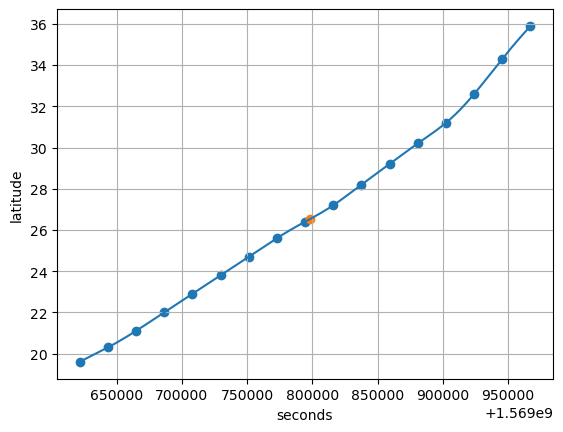

In [7]:
plt.scatter(time_secs_arr,bt_lats)
t_arr = np.arange(time_secs_arr.min(),time_secs_arr.max(),100)
plt.plot(t_arr,latspl(t_arr))
plt.scatter(merged_time.timestamp(),interp_lat)
plt.grid()
plt.ylabel('latitude')
plt.xlabel('seconds')


In [8]:
# height = 2
# high_height = 6
# grid_type = 'recentered'

# bad_mission_list = [] # Record which missions had missing data
# all_image_paths = [] # Records where all the images are saved to be opened for QC

# max_radar_reflectivity_list = []
# max_IMERG_list = []
# max_radar_derived_rain_list = []

# med_radar_reflectivity_list = []
# med_IMERG_list = []
# med_radar_derived_rain_list = []

# max_ref_rad_list = []
# max_imerg_radius_list = []
# max_rain_radius_list = []
# med_ref_rad_list = []
# med_imerg_radius_list = []
# med_rain_radius_list = []

# cylindrical_data_rain_azi_mean_list = []
# cylindrical_data_IMERG_azi_mean_list = []
# cylindrical_data_reflectivity_azi_mean_list = []

# cylindrical_rain_max_mean_list = []
# cylindrical_reflectivity_max_mean_list = []
# cylindrical_imerg_max_mean_list = []

# for case_loop in tc_radar_data['num_cases'].astype(int).values: # Run all
# # for case_loop in [60]: # Custom Start and End
#     print(case_loop)
#     precip_list = []
#     for now_it in range(len(all_time_filepaths.loc[case_loop])):
#         fn = all_time_filepaths.loc[case_loop][now_it]
#         f = h5py.File(fn, 'r')

#         # Work on precip file
#         groups = [ x for x in f.keys() ]
#         # print(groups)
#         gridMembers = [ x for x in f['Grid'] ]
#         # print(gridMembers)

#         # Get the precipitation, latitude, and longitude variables
#         precip = f['Grid/precipitation'][0][:][:]
#         precip = np.transpose(precip)
#         precip[precip<-999]=np.nan

#         theLats = f['Grid/lat'][:]
#         theLons = f['Grid/lon'][:]
#         x, y = np.float32(np.meshgrid(theLons, theLats))

#         precip_list.append(precip)
    
#     # For now, we take a mean. Might need a different filter in the future
#     precip_mean = np.mean(np.asarray(precip_list),axis=0)
    
#     #---------------------------------------------------------------------------------------------------------
#     radar_lat_grid = tc_radar_data[grid_type+'_latitudes'].sel(num_cases=case_loop)
#     radar_lat_grid_drop_1 = radar_lat_grid.dropna('x_dist',thresh=1).dropna('y_dist',thresh=1)
    
#     lat_loc_arrs = np.where(radar_lat_grid_drop_1.isnull()) # first array is y, second array is x
#     lat_arr_0_unique_len = len(np.unique(lat_loc_arrs[0]))
#     lat_arr_1_unique_len = len(np.unique(lat_loc_arrs[1]))
    
#     # These conditional statements help decide which axis to drop, maximizing grid size
#     if lat_arr_0_unique_len > lat_arr_1_unique_len:    
#         radar_lat_grid_dropped = radar_lat_grid_drop_1.dropna('x_dist')
#     elif lat_arr_0_unique_len < lat_arr_1_unique_len:
#         radar_lat_grid_dropped = radar_lat_grid_drop_1.dropna('y_dist')
#     else:
#         radar_lat_grid_dropped = radar_lat_grid_drop_1.dropna('x_dist')   
    
#     radar_lon_grid = tc_radar_data[grid_type+'_longitudes'].sel(num_cases=case_loop)
#     radar_lon_grid_drop_1 = radar_lon_grid.dropna('x_dist',thresh=1).dropna('y_dist',thresh=1)

#     lon_loc_arrs = np.where(radar_lon_grid_drop_1.isnull()) # first array is y, second array is x
#     lon_arr_0_unique_len = len(np.unique(lon_loc_arrs[0]))
#     lon_arr_1_unique_len = len(np.unique(lon_loc_arrs[1]))

#     # These conditional statements help decide which axis to drop, maximizing grid size
#     if lon_arr_0_unique_len > lon_arr_1_unique_len:    
#         radar_lon_grid_dropped = radar_lon_grid_drop_1.dropna('x_dist')
#     elif lon_arr_0_unique_len < lon_arr_1_unique_len:
#         radar_lon_grid_dropped = radar_lon_grid_drop_1.dropna('y_dist')
#     else:
#         radar_lon_grid_dropped = radar_lon_grid_drop_1.dropna('x_dist')
        
#         # If there is no data due to lack of passes, record and continue
#     if len(radar_lon_grid_dropped) == 0 or len(radar_lat_grid_dropped) == 0:
#         bad_mission = tc_radar_data['mission_ID'].sel(num_cases=case_loop)
#         bad_mission_list.append(bad_mission)
#         continue
# #     #---------------------------------------------------------------------------------------------------------

#     long_inds = np.where((x>=np.nanmin(radar_lon_grid_dropped.values)) &
#              (x <= np.nanmax(radar_lon_grid_dropped.values)))

#     lat_inds = np.where((y>=np.nanmin(radar_lat_grid_dropped.values)) &
#              (y <= np.nanmax(radar_lat_grid_dropped.values)))
    
#     sliced_precip = precip_mean[lat_inds[0].min()-20:lat_inds[0].max()+20,long_inds[1].min()-20:long_inds[1].max()+20]
#     sliced_lon_grid = x[lat_inds[0].min()-20:lat_inds[0].max()+20,long_inds[1].min()-20:long_inds[1].max()+20]
#     sliced_lat_grid = y[lat_inds[0].min()-20:lat_inds[0].max()+20,long_inds[1].min()-20:long_inds[1].max()+20]
#     bt_lat, bt_lon = tc_radar_data['lat_ships'].sel(num_cases=case_loop).sel(num_ships_times=0).values,\
#         tc_radar_data['lon_ships'].sel(num_cases=case_loop).sel(num_ships_times=0).values*-1

#     # 2 km center
#     radar_center_lat = tc_radar_data['tc_center_latitudes'].sel(num_cases=case_loop).sel(level=height).values
#     radar_center_lon = tc_radar_data['tc_center_longitudes'].sel(num_cases=case_loop).sel(level=height).values
    
#     # 6 km center
    
#     radar_center_lat_high = tc_radar_data['tc_center_latitudes'].sel(num_cases=case_loop).sel(level=high_height).values
#     radar_center_lon_high = tc_radar_data['tc_center_longitudes'].sel(num_cases=case_loop).sel(level=high_height).values
        
# #---------------------------IMERG Cartesian Plot--------------------------------------------
#     # Plot IMERG pcolormesh. cmap has 21 levels, so we use factors of 21 for vmax.
# #     imerg_plot = ax1.contourf(sliced_lon_grid,sliced_lat_grid,sliced_precip,clevs1,cmap=cmap)

#     bt_lats = tc_radar_data.sel(num_cases=case_loop)['lat_ships'].dropna('num_ships_times').values
#     bt_lons = tc_radar_data.sel(num_cases=case_loop)['lon_ships'].dropna('num_ships_times').values * -1

#     bt_times = tc_radar_data.sel(num_cases=case_loop)['num_ships_times'].where(tc_radar_data.sel(num_cases=case_loop)['lat_ships'].notnull()).dropna('num_ships_times').values
    
#     year_now,month,day,hour,minute = tc_radar_data['merge_year'].sel(num_cases=case_loop).values,\
#         tc_radar_data['merge_month'].sel(num_cases=case_loop).values,tc_radar_data['merge_day'].sel(num_cases=case_loop).values,\
#         tc_radar_data['merge_hour'].sel(num_cases=case_loop).values,tc_radar_data['merge_min'].sel(num_cases=case_loop).values
    
#     merged_time = dt.datetime(year_now,month,day,hour,minute)
    
#     # Get Storm Name and time
#     storm_name = str(tc_radar_data['storm_name'].sel(num_cases=case_loop).values)
#     current_tc_radar_time = merged_time

#     # Get nearest synoptic time
#     nearest_syn = pd.DataFrame([merged_time])[0].dt.round("6h")[0].to_pydatetime()
#     nearest_syn_ts = nearest_syn.timestamp()
#     time_secs_arr = nearest_syn_ts + (bt_times * 3600)
    
#     # Don't plot best-track (SHIPS)center if there is no information
#     if len(bt_lats) > 0:
#         latspl = UnivariateSpline(time_secs_arr,bt_lats,k=5,s=0)
#         interp_lat = latspl(merged_time.timestamp())
#     if len(bt_lons) > 0:
#         lonspl = UnivariateSpline(time_secs_arr,bt_lons,k=5,s=0)
#         interp_lon = lonspl(merged_time.timestamp())

#     # Find distances and angle from center of image for polar plotting later
    
#     # Get angles from center (MATH angles)
#     # Remember, IMERG is centered to best-track and TC-RADAR is centered to height image
    
#     # For TC-Radar Centers
#     best_track_angle = math_to_meteo_angle(get_angle(radar_center_lon,radar_center_lat,
#                                  interp_lon,interp_lat)) * (np.pi/180)
    

#     high_height_angle = math_to_meteo_angle(get_angle(radar_center_lon,radar_center_lat,
#                                  radar_center_lon_high,radar_center_lat_high)) * (np.pi/180)

#     # For IMERG Centers
#     low_height_angle_imerg = math_to_meteo_angle(get_angle(interp_lon,interp_lat,
#                                         radar_center_lon,radar_center_lat)) * (np.pi/180)
    
#     high_height_angle_imerg = math_to_meteo_angle(get_angle(interp_lon,interp_lat,radar_center_lon_high,
#                                          radar_center_lat_high)) * (np.pi/180)
    
    
#     # Get distance from center
    
#     # For TC-Radar Centers
#     best_track_dist = pointdist_calc(Lat1 = radar_center_lat,Lon1 = radar_center_lon,
#                                      Lat2 = interp_lat,Lon2 = interp_lon) # km

#     high_height_dist = pointdist_calc(Lat1 = radar_center_lat,Lon1 = radar_center_lon,
#                                      Lat2 = radar_center_lat_high,Lon2 = radar_center_lon_high) # km

#     # For IMERG Centers

#     low_height_dist_imerg = pointdist_calc(Lat1 = interp_lat,Lon1 = interp_lon,
#                                      Lat2 = radar_center_lat,Lon2 = radar_center_lon) # km

#     high_height_dist_imerg = pointdist_calc(Lat1 = interp_lat,Lon1 = interp_lon,
#                                      Lat2 = radar_center_lat_high,Lon2 = radar_center_lon_high) # km
    
#     just_a_lon = radar_lon_grid_dropped[10,8].values
#     just_a_lat = radar_lat_grid_dropped[160,8].values
#     shr_dir = tc_radar_data['shtd_ships'].sel(num_cases=case_loop).sel(num_ships_times = 0).values
#     shr_mag = tc_radar_data['shrd_ships'].sel(num_cases=case_loop).sel(num_ships_times = 0).values
    
#     # NOT INTERPOLATED
#     U = shr_mag * np.sin(shr_dir*(np.pi/180))
#     V = shr_mag * np.cos(shr_dir*(np.pi/180))
    
#     # NOT INTERPOLATED
#     x_motion = tc_radar_data['motion_x_ships'].sel(num_cases=case_loop).sel(num_ships_times = 0).values
#     y_motion = tc_radar_data['motion_y_ships'].sel(num_cases=case_loop).sel(num_ships_times = 0).values
#     just_a_lat_2 = radar_lat_grid_dropped[20,8].values

# #---------------------------IMERG Polar Plot--------------------------------------------

#     dx = 2
#     dy = 2

#     # Interpolate IMERG data to equal-distance grid

#     eq_lon_grid,eq_lat_grid,eq_dist_data = interp_to_equal_grid(sliced_lon_grid,sliced_lat_grid,
#                                                             sliced_precip,dx = dx,dy=dy)

#     # Interpolate to cylindrical coordinates

#     # First, use best-track center to find center index

#     distance_arr = distance_calculator(eq_lon_grid, eq_lat_grid,(interp_lon,interp_lat)).values

#     # Sometimes this may not center the best, given 10 km resolution
#     nearest_ind = np.where(distance_arr == np.nanmin(distance_arr))

#     # This identifies where the center point is in the IMERG data and goes with a radius that is within the data.
#     ind_0 = eq_dist_data.shape[0]
#     ind_1 = eq_dist_data.shape[1]
#     diff_0 = ind_0 - nearest_ind[1]
#     diff_1 = ind_1 - nearest_ind[0]
#     max_rad_possible = np.asarray([diff_0,diff_1,nearest_ind[0],nearest_ind[1]]).min()

#     cylindrical_data_IMERG, THETA_IMERG, rad_arr_IMERG = x_y_grid_to_cylindrical(center_inds=[nearest_ind[1][0],nearest_ind[0][0]],
#                             radius_min=0,radius_max=max_rad_possible-1,radius_interval=1,
#                             NOP=1000,x_grid=np.asarray(range(eq_dist_data.shape[0])),
#                                                                y_grid=np.asarray(range(eq_dist_data.shape[1])),
#                             data=eq_dist_data)

# #---------------------------TC-RADAR--------------------------------------------
    
#     x = tc_radar_data['x_dist'].values
#     y = tc_radar_data['y_dist'].values
    
#     # Grab Reflectivity data at level = 2 km
#     reflectivity = tc_radar_data[grid_type+'_reflectivity'].sel(num_cases=case_loop,level=2)
    
#     # Interpolate to cylindrical coordinates
#     cylindrical_data_reflectivity, THETA, rad_arr = x_y_grid_to_cylindrical(center_inds = [0,0],radius_min = 1,
#                         radius_max = 200,radius_interval = 1,
#                         NOP = 1000,x_grid = x, y_grid = y, 
#                         data = reflectivity.values)


# #-------------------------- Plot rainfall rate derived from reflectivity plot----------------

#     Z = 10**(reflectivity/10)
#     R = (Z/300)**(1/1.35) # mm/hr
    
#     cylindrical_data_rain, THETA_rain, rad_arr_rain = x_y_grid_to_cylindrical(center_inds = [0,0],radius_min = 1,
#                         radius_max = 200,radius_interval = 1,
#                         NOP = 1000,x_grid = x, y_grid = y, 
#                         data = R.values)
    
#     # Calculate azimuthal means
    
#     cylindrical_data_rain_azi_mean = np.nanmean(cylindrical_data_rain,axis=1)
#     cylindrical_data_IMERG_azi_mean = np.nanmean(cylindrical_data_IMERG,axis=1)
#     cylindrical_data_reflectivity_azi_mean = np.nanmean(cylindrical_data_reflectivity,axis=1)
    
#     cylindrical_data_rain_azi_mean_list.append(cylindrical_data_rain_azi_mean)
#     cylindrical_data_IMERG_azi_mean_list.append(cylindrical_data_IMERG_azi_mean)
#     cylindrical_data_reflectivity_azi_mean_list.append(cylindrical_data_reflectivity_azi_mean)
    
#     # Find max azimuthal mean and radius
#     max_mean_cylindrical_rain = np.nanmax(cylindrical_data_rain_azi_mean)
#     max_mean_cylindrical_rain_rad = rad_arr_rain[np.nanargmax(cylindrical_data_rain_azi_mean)]
    
#     max_mean_cylindrical_IMERG = np.nanmax(cylindrical_data_IMERG_azi_mean)
#     max_mean_cylindrical_IMERG_rad = rad_arr_IMERG[np.nanargmax(cylindrical_data_IMERG_azi_mean)]
    
#     max_mean_cylindrical_reflectivity = np.nanmax(cylindrical_data_reflectivity_azi_mean)
#     max_mean_cylindrical_reflectivity_rad = rad_arr[np.nanargmax(cylindrical_data_reflectivity_azi_mean)]
    
#     cylindrical_rain_max_mean_list.append([max_mean_cylindrical_rain,max_mean_cylindrical_rain_rad])
#     cylindrical_reflectivity_max_mean_list.append([max_mean_cylindrical_reflectivity,
#                                                   max_mean_cylindrical_reflectivity_rad])
#     cylindrical_imerg_max_mean_list.append([max_mean_cylindrical_IMERG,max_mean_cylindrical_IMERG_rad])
    
#     imerg_search_inds = np.where(rad_arr_IMERG*dx <= 200) # We only want to search within 200 km
    
#     search_inds = np.where(rad_arr_IMERG*dx <= 200)
#     max_radar_reflectivity_list.append(np.nanmax(cylindrical_data_reflectivity))
#     max_rad_ind_ref = np.where(cylindrical_data_reflectivity == np.nanmax(cylindrical_data_reflectivity))[0]
#     max_ref_radius = rad_arr[max_rad_ind_ref][0]
#     max_ref_rad_list.append(max_ref_radius)
    
#     max_IMERG_list.append(np.nanmax(cylindrical_data_IMERG[imerg_search_inds]))
#     max_rad_ind_imerg = np.where(cylindrical_data_IMERG[imerg_search_inds] == np.nanmax(cylindrical_data_IMERG[imerg_search_inds]))[0]
#     max_imerg_radius = rad_arr_IMERG[imerg_search_inds][max_rad_ind_imerg][0]
#     max_imerg_radius_list.append(max_imerg_radius*dx)
    
#     max_radar_derived_rain_list.append(np.nanmax(cylindrical_data_rain))
#     max_rain_ind = np.where(cylindrical_data_rain == np.nanmax(cylindrical_data_rain))[0]
#     max_rain_radius = rad_arr_rain[max_rain_ind][0]
#     max_rain_radius_list.append(max_rain_radius)
    
#     med_radar_reflectivity_list.append(np.nanmedian(cylindrical_data_reflectivity))
# #     med_rad_ind_ref = np.where(cylindrical_data_reflectivity == np.nanmedian(cylindrical_data_reflectivity))[0]
# #     med_ref_radius = rad_arr[med_rad_ind_ref][0]
# #     med_ref_rad_list.append(med_ref_radius)
    
#     med_IMERG_list.append(np.nanmedian(cylindrical_data_IMERG[imerg_search_inds]))
# #     med_rad_ind_imerg = np.where(cylindrical_data_IMERG[imerg_search_inds] == np.nanmedian(cylindrical_data_IMERG[imerg_search_inds]))[0]
# #     med_imerg_radius = rad_arr_IMERG[imerg_search_inds][med_rad_ind_imerg][0]
# #     med_imerg_radius_list.append(med_imerg_radius*dx)
    
#     med_radar_derived_rain_list.append(np.nanmedian(cylindrical_data_rain))
# #     med_rain_ind = np.where(cylindrical_data_IMERG == np.nanmedian(cylindrical_data_IMERG))[0]
# #     med_rain_radius = rad_arr_IMERG[med_rain_ind][0]
# #     med_rain_radius_list.append(med_rain_radius)
    